# Analyzing the effect of outliers

This data was generated as part of the following blog entry. I generated two regressions. The only difference between both is that the second has an outlier. I study graphically the effects of an outlier for a regression. You can check the interactive graph in the blog entry. 

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [2]:
np.random.seed(seed=5)
n_sample = 20
indp_var = np.linspace(0, 3, n_sample) 
indp_var_const = sm.add_constant(indp_var)
beta = np.array([0.5, 3])
dep_var = np.dot(indp_var_const, beta) + np.random.normal(size=n_sample)


In [3]:
model = sm.OLS(dep_var, indp_var_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     107.4
Date:                Sat, 27 Aug 2016   Prob (F-statistic):           5.13e-09
Time:                        20:27:31   Log-Likelihood:                -29.468
No. Observations:                  20   AIC:                             62.94
Df Residuals:                      18   BIC:                             64.93
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.7979      0.480      1.663      0.1

In [4]:
predicted_values = results.predict()

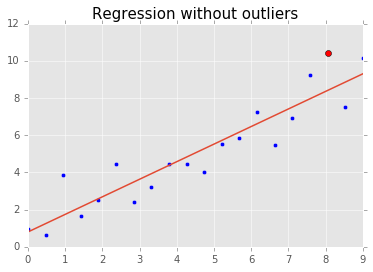

In [5]:
%matplotlib inline
plt.style.use('ggplot')
fig_1, ax = plt.subplots()
ax.scatter(indp_var*3, dep_var)
ax.plot(indp_var*3, predicted_values, linewidth=1.5)
ax.set_xlim([0, 9])
ax.set_title('Regression without outliers', fontsize=15)
ax.plot((indp_var*3)[17], dep_var[17],color="red", marker='o', ms=6)

In [6]:
#Inserting an outlier and recalculating regression
np.random.seed(seed=5)
dep_var_2 = np.dot(indp_var_const, beta) + np.random.normal(size=n_sample)
dep_var_2[17] = 40
model_2 = sm.OLS(dep_var_2, indp_var_const)
results = model_2.fit()
print(results.summary())
predicted_values_2 = results.predict()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     8.126
Date:                Sat, 27 Aug 2016   Prob (F-statistic):             0.0106
Time:                        20:27:31   Log-Likelihood:                -66.432
No. Observations:                  20   AIC:                             136.9
Df Residuals:                      18   BIC:                             138.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.8929      3.045     -0.293      0.7

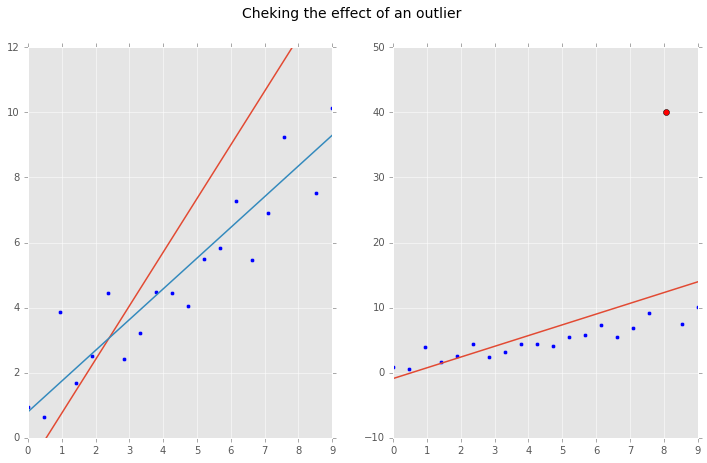

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,7))
ax1.scatter(indp_var*3, dep_var_2)
ax1.plot(indp_var*3, predicted_values_2, linewidth=1.5)
ax1.plot(indp_var*3, predicted_values, linewidth=1.5)
ax1.set_xlim([0, 9])
ax1.set_ylim([0, 12])
ax2.scatter(indp_var*3, dep_var_2)
ax2.plot(indp_var*3, predicted_values_2, linewidth=1.5)
ax2.set_xlim([0, 9])
ax2.plot((indp_var*3)[17], dep_var_2[17],color="red", marker='o', ms=6)
fig.suptitle("Cheking the effect of an outlier", fontsize=14)


In [22]:
original_ds = np.column_stack((indp_var*3, dep_var, predicted_values, dep_var_2, predicted_values_2))
np.savetxt("original_ds.csv", original_ds, delimiter=",", fmt= "%10.5f", header="ind_var,dep_var, pred_1, dep_var_2, pred_val_2 ")